In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob
import pickle

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# 데이터 분리

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/빅콘테스트 2022/data/user+loan 전처리 data(train).csv') 
# df = pd.read_csv('/content/drive/MyDrive/빅콘테스트 2022/data/user+loan 전처리 data(test).csv') 

In [ ]:
orin = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10270011 entries, 0 to 10270010
Data columns (total 22 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   loanapply_insert_time                object 
 2   bank_id                              int64  
 3   product_id                           int64  
 4   loan_limit                           float64
 5   loan_rate                            float64
 6   is_applied                           float64
 7   user_id                              float64
 8   gender                               object 
 9   credit_score                         float64
 10  yearly_income                        float64
 11  income_type                          object 
 12  employment_type                      object 
 13  houseown_type                        object 
 14  desired_amount                       float64
 15  purpose                       

In [ ]:
print("총 이용자 수")
print(len(df['user_id'].unique()))
user_lst = df['user_id'].unique().tolist()

총 이용자 수
259328


In [ ]:
df['is_applied'].value_counts()/len(df)

0.0    0.944914
1.0    0.055086
Name: is_applied, dtype: float64

In [ ]:
# 데이터가 너무 많아서 실용적으로 사용하기 힘들어서 유저 중 일부로 언더샘플링 진행
import random
random.seed(25) # 랜덤시드 고정
user_sample_lst = random.sample(user_lst,round(len(user_lst)*0.05))

In [ ]:
# 실제로 모델링에 사용할할 샘플리스트
len(user_sample_lst)

12966

In [ ]:
df = df.loc[df['user_id'].isin(user_sample_lst)] #undersampling
df.shape

(513302, 22)

In [ ]:
from sklearn.model_selection import train_test_split
# eda를 분석하기 위해 train셀과 test셀로 나눔
data = df[df.columns.difference(['is_applied'])]
target = df['is_applied']

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=1)

In [ ]:
x_train.shape

(410641, 21)

In [ ]:
x_train.isnull().sum()

application_id                              0
bank_id                                     0
credit_score                            46706
desired_amount                              0
employment_type                             0
existing_loan_amt                           0
existing_loan_cnt                           0
gender                                      0
houseown_type                               0
income_type                                 0
loan_limit                                213
loan_rate                                 213
loanapply_insert_time                       0
personal_rehabilitation_complete_yn    367563
personal_rehabilitation_yn             233165
product_id                                  0
purpose                                  7318
user_age                                 3986
user_id                                     0
working month                               0
yearly_income                               0
dtype: int64

In [ ]:
x_train.shape

(410641, 21)

In [ ]:
x_train.loc[x_train['user_age'].isna()]

,application_id,bank_id,credit_score,desired_amount,employment_type,existing_loan_amt,existing_loan_cnt,gender,houseown_type,income_type,...,loan_rate,loanapply_insert_time,personal_rehabilitation_complete_yn,personal_rehabilitation_yn,product_id,purpose,user_age,user_id,working month,yearly_income
2637321,124341,17,890.0,3000.0,정규직,0.0,0.0,unknown,전월세,EARNEDINCOME,...,13.8,2022-04-17 02:11:54,NaN,NaN,19,LIVING,NaN,300473.0,8,4800.0
5609932,559361,44,810.0,5000.0,정규직,9900.0,1.0,unknown,자가,EARNEDINCOME,...,10.0,2022-03-24 11:14:30,NaN,NaN,8,LIVING,NaN,555652.0,9,5000.0
9541527,1643089,38,940.0,5500.0,정규직,0.0,1.0,unknown,자가,EARNEDINCOME,...,9.3,2022-03-28 22:14:36,NaN,NaN,223,LIVING,NaN,504462.0,163,5500.0
7159766,460123,25,830.0,1000.0,계약직,0.0,0.0,unknown,전월세,EARNEDINCOME,...,16.9,2022-05-15 03:07:07,NaN,0.0,169,LIVING,NaN,77407.0,3,3600.0
3640028,2148608,22,750.0,1300.0,정규직,0.0,0.0,unknown,기타가족소유,EARNEDINCOME,...,16.4,2022-03-31 11:26:40,NaN,NaN,124,SWITCHLOAN,NaN,738632.0,8,2400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238886,938654,1,NaN,4000.0,정규직,0.0,0.0,unknown,전월세,EARNEDINCOME,...,10.9,2022-04-18 09:47:33,NaN,NaN,61,BUSINESS,NaN,389040.0,5,2800.0
5335428,135078,58,560.0,3000.0,정규직,4900.0,7.0,unknown,자가,EARNEDINCOME2,...,13.8,2022-04-22 20:33:14,NaN,NaN,175,SWITCHLOAN,NaN,786001.0,12,4800.0
6946155,1396655,63,920.0,300.0,정규직,14400.0,1.0,unknown,전월세,EARNEDINCOME,...,14.4,2022-03-22 22:31:49,NaN,NaN,226,ETC,NaN,342679.0,19,3500.0
6397203,1380812,59,950.0,4000.0,정규직,18100.0,4.0,unknown,전월세,EARNEDINCOME,...,12.8,2022-04-27 09:14:34,NaN,0.0,150,BUYHOUSE,NaN,120638.0,140,5000.0


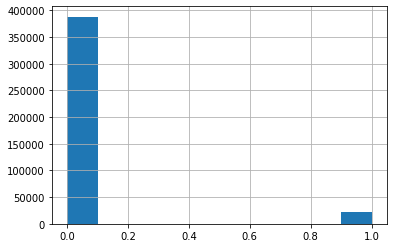

In [ ]:
y_train.hist() # 상당한 불균형 데이터

In [ ]:
y_train.value_counts()/len(y_train)
# plt.xlim([0,1])

0.0    0.944913
1.0    0.055087
Name: is_applied, dtype: float64

In [ ]:
y_train.value_counts()/len(y_train) # 거의 5% 정도만 대출 신청함
# 모델의 학습을 위해 추후에 불균형 처리를 해주어야 함

0.0    0.944913
1.0    0.055087
Name: is_applied, dtype: float64

In [ ]:
x_train.loc[x_train['application_id']==595432]

,application_id,bank_id,credit_score,desired_amount,employment_type,existing_loan_amt,existing_loan_cnt,gender,houseown_type,income_type,...,loan_rate,loanapply_insert_time,personal_rehabilitation_complete_yn,personal_rehabilitation_yn,product_id,purpose,user_age,user_id,working month,yearly_income


In [ ]:
# 은행 종류 개수 확인 >> 총 62개
len(x_train['bank_id'].unique())

61

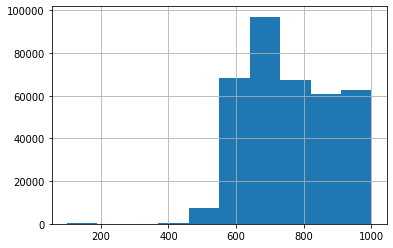

In [ ]:
x_train['credit_score'].hist() # 신용점수 히스토그램

In [ ]:
x_train.isnull().sum()

application_id                              0
bank_id                                     0
credit_score                            46706
desired_amount                              0
employment_type                             0
existing_loan_amt                           0
existing_loan_cnt                           0
gender                                      0
houseown_type                               0
income_type                                 0
loan_limit                                213
loan_rate                                 213
loanapply_insert_time                       0
personal_rehabilitation_complete_yn    367563
personal_rehabilitation_yn             233165
product_id                                  0
purpose                                  7318
user_age                                 3986
user_id                                     0
working month                               0
yearly_income                               0
dtype: int64

In [ ]:
x_train.iloc[:,[3,10,20]]

,desired_amount,loan_limit,yearly_income
6454566,2000.0,2400.0,3000.0
7231948,3000.0,2000.0,4000.0
7960971,10000.0,800.0,3200.0
3993299,3500.0,1500.0,2600.0
3379342,4000.0,4600.0,3000.0
...,...,...,...
5368083,10000.0,4400.0,4400.0
1681619,1000.0,4000.0,4000.0
6131690,5000.0,4200.0,7000.0
4507154,1000.0,2200.0,2200.0


In [ ]:
x_train.iloc[:,[3,20]]=x_train.iloc[:,[3,20]].astype(int)

count     410641.000000
mean        5145.770150
std        22892.017359
min            0.000000
25%         1000.000000
50%         3000.000000
75%         5000.000000
max      1000000.000000
Name: desired_amount, dtype: float64

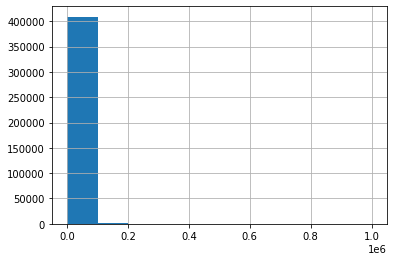

In [ ]:
x_train['desired_amount'].hist() #  히스토그램
x_train['desired_amount'].describe() # 어마어마한 맥스값 존재

In [ ]:
x_train['employment_type'].value_counts()/len(x_train) # 고용 타입 비율로 비교

정규직    0.816436
계약직    0.089290
기타     0.082135
일용직    0.012140
Name: employment_type, dtype: float64

In [ ]:
x_train['gender'].value_counts()/len(x_train) # 성별 비교

man        0.687805
woman      0.302488
unknown    0.009707
Name: gender, dtype: float64

In [ ]:
x_train['houseown_type'].value_counts()/len(x_train) # 집소유 비교

전월세       0.453749
자가        0.278986
기타가족소유    0.266588
배우자       0.000677
Name: houseown_type, dtype: float64

count    410641.000000
mean       5650.649838
std        8641.073470
min           0.000000
25%           0.000000
50%        3000.000000
75%        7000.000000
max      126900.000000
Name: existing_loan_amt, dtype: float64

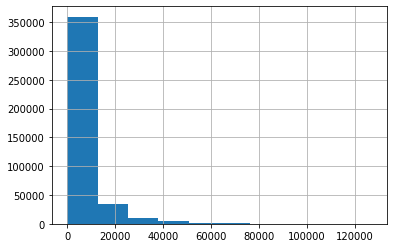

In [ ]:
x_train['existing_loan_amt'].hist()
x_train['existing_loan_amt'].describe()

In [ ]:
x_train['income_type'].value_counts()/len(x_train) # 집소유 비교

EARNEDINCOME       0.847611
EARNEDINCOME2      0.046123
PRIVATEBUSINESS    0.036555
OTHERINCOME        0.030331
FREELANCER         0.025604
PRACTITIONER       0.013776
Name: income_type, dtype: float64

In [ ]:
x_train['product_id'].value_counts() # 대출 상품이 신청되는 빈도 확인

150    8669
36     8577
61     8488
110    7888
56     7554
       ... 
93        8
76        7
21        6
146       4
13        2
Name: product_id, Length: 165, dtype: int64

In [ ]:
print("총 대출 상품 개수")
len(x_train['product_id'].unique()) 

총 대출 상품 개수


165

In [ ]:
x_train['purpose'].value_counts()/len(x_train) # 목적 비교
# 목적에 따른 신규 칼럼 넣으면 괜찮을듯

LIVING          0.500951
SWITCHLOAN      0.301429
HOUSEDEPOSIT    0.042003
BUYHOUSE        0.041114
BUSINESS        0.040651
ETC             0.029369
INVEST          0.021035
BUYCAR          0.005628
Name: purpose, dtype: float64

count    406655.000000
mean         39.017280
std           9.505293
min          19.000000
25%          31.000000
50%          38.000000
75%          45.000000
max          85.000000
Name: user_age, dtype: float64

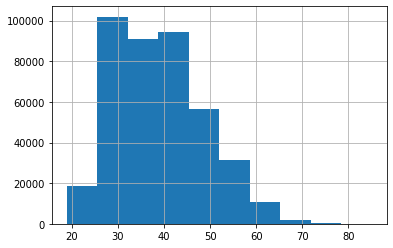

In [ ]:
x_train['user_age'].hist() # 유저 나이 분석
x_train['user_age'].describe() 
# 평균 39세 -> 역시 비교적 연령층이 높다 -> 주 생산인구

In [ ]:
print("총 이용자 수")
len(x_train['user_id'].unique()) 

총 이용자 수


12755

count    410641.000000
mean         46.921503
std          64.065055
min          -5.000000
25%           8.000000
50%          24.000000
75%          59.000000
max        1239.000000
Name: working month, dtype: float64

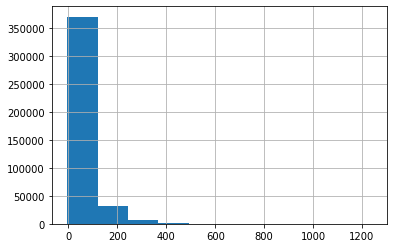

In [ ]:
x_train['working month'].hist()
x_train['working month'].describe() # 평균 2년 중앙값 23개월

count    410641.000000
mean       4639.062588
std        9152.035314
min           0.000000
25%        3000.000000
50%        3600.000000
75%        5000.000000
max      540000.000000
Name: yearly_income, dtype: float64

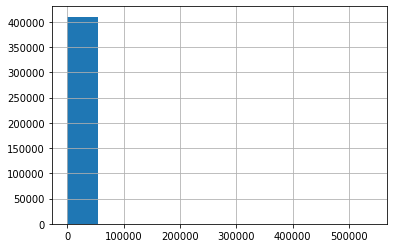

In [ ]:
x_train['yearly_income'].hist() # 유저 수입 분석
x_train['yearly_income'].describe() 

# 결측 데이터 처리

In [ ]:
df.isnull().sum()/len(df) # 결측 비율
# loan_limit 과 loan_rate와 같은경우 결측치를 그냥 제거하는게 맞겠다

application_id                         0.000000
loanapply_insert_time                  0.000000
bank_id                                0.000000
product_id                             0.000000
loan_limit                             0.000539
loan_rate                              0.000539
is_applied                             1.000000
user_id                                0.000000
gender                                 0.000000
credit_score                           0.081500
yearly_income                          0.000002
income_type                            0.000000
employment_type                        0.000000
houseown_type                          0.000000
desired_amount                         0.000000
purpose                                0.000000
personal_rehabilitation_yn             0.004750
personal_rehabilitation_complete_yn    0.786477
existing_loan_cnt                      0.000000
existing_loan_amt                      0.000000
user_age                               0

신용점수 : 대체 해야함 

개인회생자 : 어떻게 할까

나머지는 삭제하는게 맞음

In [ ]:
# df = df.dropna(subset=['loan_limit','loan_rate','purpose','user_age']) # 결측치 삭제
df = df.dropna(subset=['loan_limit','loan_rate']) #  TEST에서 결측치 삭제

In [ ]:
df.loc[df['personal_rehabilitation_complete_yn']==1].loc[df['personal_rehabilitation_yn']==1]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,credit_score,...,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,user_age,working month
143,691052,2022-06-07 16:18:55,2,93,3500.0,16.3,NaN,188656.0,man,100.0,...,정규직,전월세,1600.0,SWITCHLOAN,1.0,1.0,1.0,1600.0,41.0,60
3808,1025183,2022-06-07 02:28:20,42,216,900.0,15.3,NaN,839543.0,woman,720.0,...,정규직,전월세,3000.0,LIVING,1.0,1.0,2.0,3400.0,33.0,52
7939,1913052,2022-06-07 12:13:00,17,19,800.0,13.7,NaN,655032.0,man,670.0,...,정규직,자가,10000.0,INVEST,1.0,1.0,2.0,18100.0,43.0,38
7940,1913052,2022-06-07 12:13:00,10,149,2100.0,13.9,NaN,655032.0,man,670.0,...,정규직,자가,10000.0,INVEST,1.0,1.0,2.0,18100.0,43.0,38
7941,1913052,2022-06-07 12:13:11,47,138,800.0,15.0,NaN,655032.0,man,670.0,...,정규직,자가,10000.0,INVEST,1.0,1.0,2.0,18100.0,43.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222336,1718909,2022-06-03 13:03:56,49,195,1500.0,9.1,NaN,316241.0,woman,670.0,...,계약직,전월세,200.0,LIVING,1.0,1.0,1.0,100.0,39.0,17
3222337,1718909,2022-06-03 13:03:55,1,1,2200.0,13.9,NaN,316241.0,woman,670.0,...,계약직,전월세,200.0,LIVING,1.0,1.0,1.0,100.0,39.0,17
3222338,1718909,2022-06-03 13:03:55,27,148,1500.0,7.1,NaN,316241.0,woman,670.0,...,계약직,전월세,200.0,LIVING,1.0,1.0,1.0,100.0,39.0,17
3222339,1718909,2022-06-03 13:03:56,22,221,1300.0,17.5,NaN,316241.0,woman,670.0,...,계약직,전월세,200.0,LIVING,1.0,1.0,1.0,100.0,39.0,17


In [ ]:
df['personal_rehab'] = 0

In [ ]:
# 개인 회생자 컬럼을 하나의의 칼럼으로 줄이고 범주형으로 변경
df.loc[(df['personal_rehabilitation_yn']==1)&(df['personal_rehabilitation_complete_yn']==1),'personal_rehab'] = 'A'
df.loc[(df['personal_rehabilitation_yn']==1)&(df['personal_rehabilitation_complete_yn']==0),'personal_rehab'] = 'B'
df.loc[(df['personal_rehabilitation_yn']==0)&(df['personal_rehabilitation_complete_yn']==1),'personal_rehab'] = 'C'
df.loc[(df['personal_rehabilitation_yn']==0)&(df['personal_rehabilitation_complete_yn']==0),'personal_rehab'] = 'D'
df.loc[(df['personal_rehabilitation_yn'].isna())|(df['personal_rehabilitation_complete_yn'].isna()),'personal_rehab'] = 'unknown'

In [ ]:
# 구칼럼 색제
df.pop('personal_rehabilitation_yn')
df.pop('personal_rehabilitation_complete_yn')

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
3257234    NaN
3257235    NaN
3257236    NaN
3257237    NaN
3257238    NaN
Name: personal_rehabilitation_complete_yn, Length: 3255482, dtype: float64

In [ ]:
df.loc[df['credit_score'].isna()]['user_id'].value_counts()

707775.0    411
429075.0    394
282160.0    389
839463.0    344
385334.0    308
           ... 
398375.0      1
796858.0      1
575760.0      1
229378.0      1
376264.0      1
Name: user_id, Length: 11619, dtype: int64

In [ ]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer()

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498985 entries, 0 to 10270010
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   application_id         498985 non-null  int64  
 1   loanapply_insert_time  498985 non-null  object 
 2   bank_id                498985 non-null  int64  
 3   product_id             498985 non-null  int64  
 4   loan_limit             498985 non-null  float64
 5   loan_rate              498985 non-null  float64
 6   is_applied             498985 non-null  float64
 7   user_id                498985 non-null  float64
 8   gender                 498985 non-null  object 
 9   credit_score           446366 non-null  float64
 10  yearly_income          498985 non-null  float64
 11  income_type            498985 non-null  object 
 12  employment_type        498985 non-null  object 
 13  houseown_type          498985 non-null  object 
 14  desired_amount         498985 non-

In [ ]:
df.iloc[:,[0,2,3,7]] = df.iloc[:,[0,2,3,7]].astype(str) # 범주형인데 numeric형 Str로 변경

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255482 entries, 0 to 3257238
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         object 
 1   loanapply_insert_time  object 
 2   bank_id                object 
 3   product_id             object 
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
 7   user_id                object 
 8   gender                 object 
 9   credit_score           float64
 10  yearly_income          float64
 11  income_type            object 
 12  employment_type        object 
 13  houseown_type          object 
 14  desired_amount         float64
 15  purpose                object 
 16  existing_loan_cnt      float64
 17  existing_loan_amt      float64
 18  user_age               float64
 19  working month          int64  
 20  personal_rehab         object 
dtypes: float64(9), int64(1), object(11)
memory usage: 675.

In [ ]:
# ITERATORIMPUTER로 CREDIT SCORE 결측치를 처리하기 위해 USER 정보만 인덱싱
df_imp = df.copy()
df_imp = df_imp.iloc[:,[9,10,11,12,14,16,17,18,19]]
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255482 entries, 0 to 3257238
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   credit_score       float64
 1   yearly_income      float64
 2   income_type        object 
 3   employment_type    object 
 4   desired_amount     float64
 5   existing_loan_cnt  float64
 6   existing_loan_amt  float64
 7   user_age           float64
 8   working month      int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 377.4+ MB


In [ ]:
df_imp = pd.get_dummies(df_imp,drop_first=True)

In [ ]:
imputer.fit(df_imp) # train data의의 imputer로 train, test 결측치 처리해야함

IterativeImputer()

In [ ]:
df_imp = imputer.transform(df_imp)

In [ ]:
df_imp = pd.DataFrame(df_imp)

In [ ]:
df['credit_score']=df_imp.iloc[:,0].tolist()

In [ ]:
df.isnull().sum()/len(df)

application_id           0.000000
loanapply_insert_time    0.000000
bank_id                  0.000000
product_id               0.000000
loan_limit               0.000000
loan_rate                0.000000
is_applied               1.000000
user_id                  0.000000
gender                   0.000000
credit_score             0.000000
yearly_income            0.000002
income_type              0.000000
employment_type          0.000000
houseown_type            0.000000
desired_amount           0.000000
purpose                  0.000000
existing_loan_cnt        0.000000
existing_loan_amt        0.000000
user_age                 0.011197
working month            0.000000
personal_rehab           0.000000
dtype: float64

In [ ]:
# df.to_csv('/content/drive/MyDrive/빅콘테스트 2022/data/user+loan 전처리 data(train)_5%.csv',index=False) # train
df.to_csv('/content/drive/MyDrive/빅콘테스트 2022/data/user+loan 전처리 data(test)_5%.csv',index=False) # test

# mi score

In [ ]:
# rain셀과 test셀로 나눔
data = df[df.columns.difference(['is_applied'])]
target = df['is_applied']

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7988200 entries, 3483730 to 2675484
Data columns (total 21 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   bank_id                              int64  
 2   credit_score                         float64
 3   desired_amount                       float64
 4   employment_type                      object 
 5   existing_loan_amt                    float64
 6   existing_loan_cnt                    float64
 7   gender                               object 
 8   houseown_type                        object 
 9   income_type                          object 
 10  loan_limit                           float64
 11  loan_rate                            float64
 12  loanapply_insert_time                object 
 13  personal_rehabilitation_complete_yn  float64
 14  personal_rehabilitation_yn           float64
 15  product_id                

In [ ]:
# 결측치를 처리한 다음에는 application만 제외하고 다 검사해봐야함
cols = x_train.columns.difference(['application_id','credit_score','personal_rehabilitation_complete_yn','personal_rehabilitation_yn','loanapply_insert_time','user_id'])

X = x_train.loc[:,cols]
X

,bank_id,desired_amount,employment_type,existing_loan_amt,existing_loan_cnt,gender,houseown_type,income_type,loan_limit,loan_rate,product_id,purpose,user_age,working month,yearly_income
3483730,64,1400.0,정규직,5600.0,7.0,man,전월세,EARNEDINCOME,1700.0,9.9,254,LIVING,34.0,53,3100.0
3419236,11,5000.0,정규직,0.0,0.0,man,자가,EARNEDINCOME,5600.0,12.3,170,SWITCHLOAN,43.0,45,5700.0
5802996,23,30000.0,계약직,0.0,1.0,woman,전월세,PRACTITIONER,3600.0,9.9,236,BUYHOUSE,30.0,3,3600.0
339013,62,28000.0,정규직,0.0,1.0,woman,전월세,EARNEDINCOME,4500.0,7.4,200,HOUSEDEPOSIT,33.0,136,4500.0
155723,62,1400.0,정규직,2500.0,2.0,woman,자가,EARNEDINCOME,1400.0,7.3,48,SWITCHLOAN,45.0,11,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7258098,55,10000.0,정규직,11200.0,8.0,man,자가,EARNEDINCOME,300.0,15.9,25,SWITCHLOAN,45.0,46,5600.0
742496,14,40000.0,정규직,0.0,0.0,man,전월세,EARNEDINCOME,800.0,13.9,197,BUYHOUSE,34.0,53,200.0
9997768,41,1000.0,정규직,0.0,0.0,man,전월세,EARNEDINCOME,4300.0,10.8,222,LIVING,40.0,9,4800.0
7006251,32,800.0,정규직,1500.0,3.0,man,전월세,PRIVATEBUSINESS,1500.0,14.5,56,LIVING,41.0,59,6000.0


In [ ]:
# bank id와 product_id str화
X['bank_id'] = X['bank_id'].astype(str)
X['product_id'] = X['product_id'].astype(str)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7988200 entries, 3483730 to 2675484
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   bank_id            object
 1   desired_amount     int64 
 2   employment_type    object
 3   existing_loan_amt  int64 
 4   existing_loan_cnt  int64 
 5   gender             object
 6   houseown_type      object
 7   income_type        object
 8   loan_limit         int64 
 9   loan_rate          int64 
 10  product_id         object
 11  purpose            object
 12  user_age           int64 
 13  working month      int64 
 14  yearly_income      int64 
dtypes: int64(8), object(7)
memory usage: 975.1+ MB


In [ ]:
X.iloc[:,[1,3,4,8,9,12,14]] = X.iloc[:,[1,3,4,8,9,12,14]].astype(int)

In [ ]:
for colname in X.select_dtypes("object"): #str 데이터 miscore계산을 위해 변형
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

In [ ]:
y = y_train
y

3483730    0.0
3419236    0.0
5802996    0.0
339013     0.0
155723     0.0
          ... 
7258098    0.0
742496     0.0
9997768    0.0
7006251    0.0
2675484    0.0
Name: is_applied, Length: 7988200, dtype: float64

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# mi score를 통헤 입력값과 출력값의 종속성을 추정한다. -> 생각보다 크기가 작다.. 내생각엔 너무 불균형이 심해서 인듯하다
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

income_type          0.017828
product_id           0.017330
purpose              0.016754
employment_type      0.016601
desired_amount       0.014901
gender               0.014546
houseown_type        0.011992
bank_id              0.011272
loan_rate            0.007733
existing_loan_cnt    0.006428
working month        0.004462
loan_limit           0.004080
yearly_income        0.003883
existing_loan_amt    0.003177
user_age             0.002922
Name: MI Scores, dtype: float64

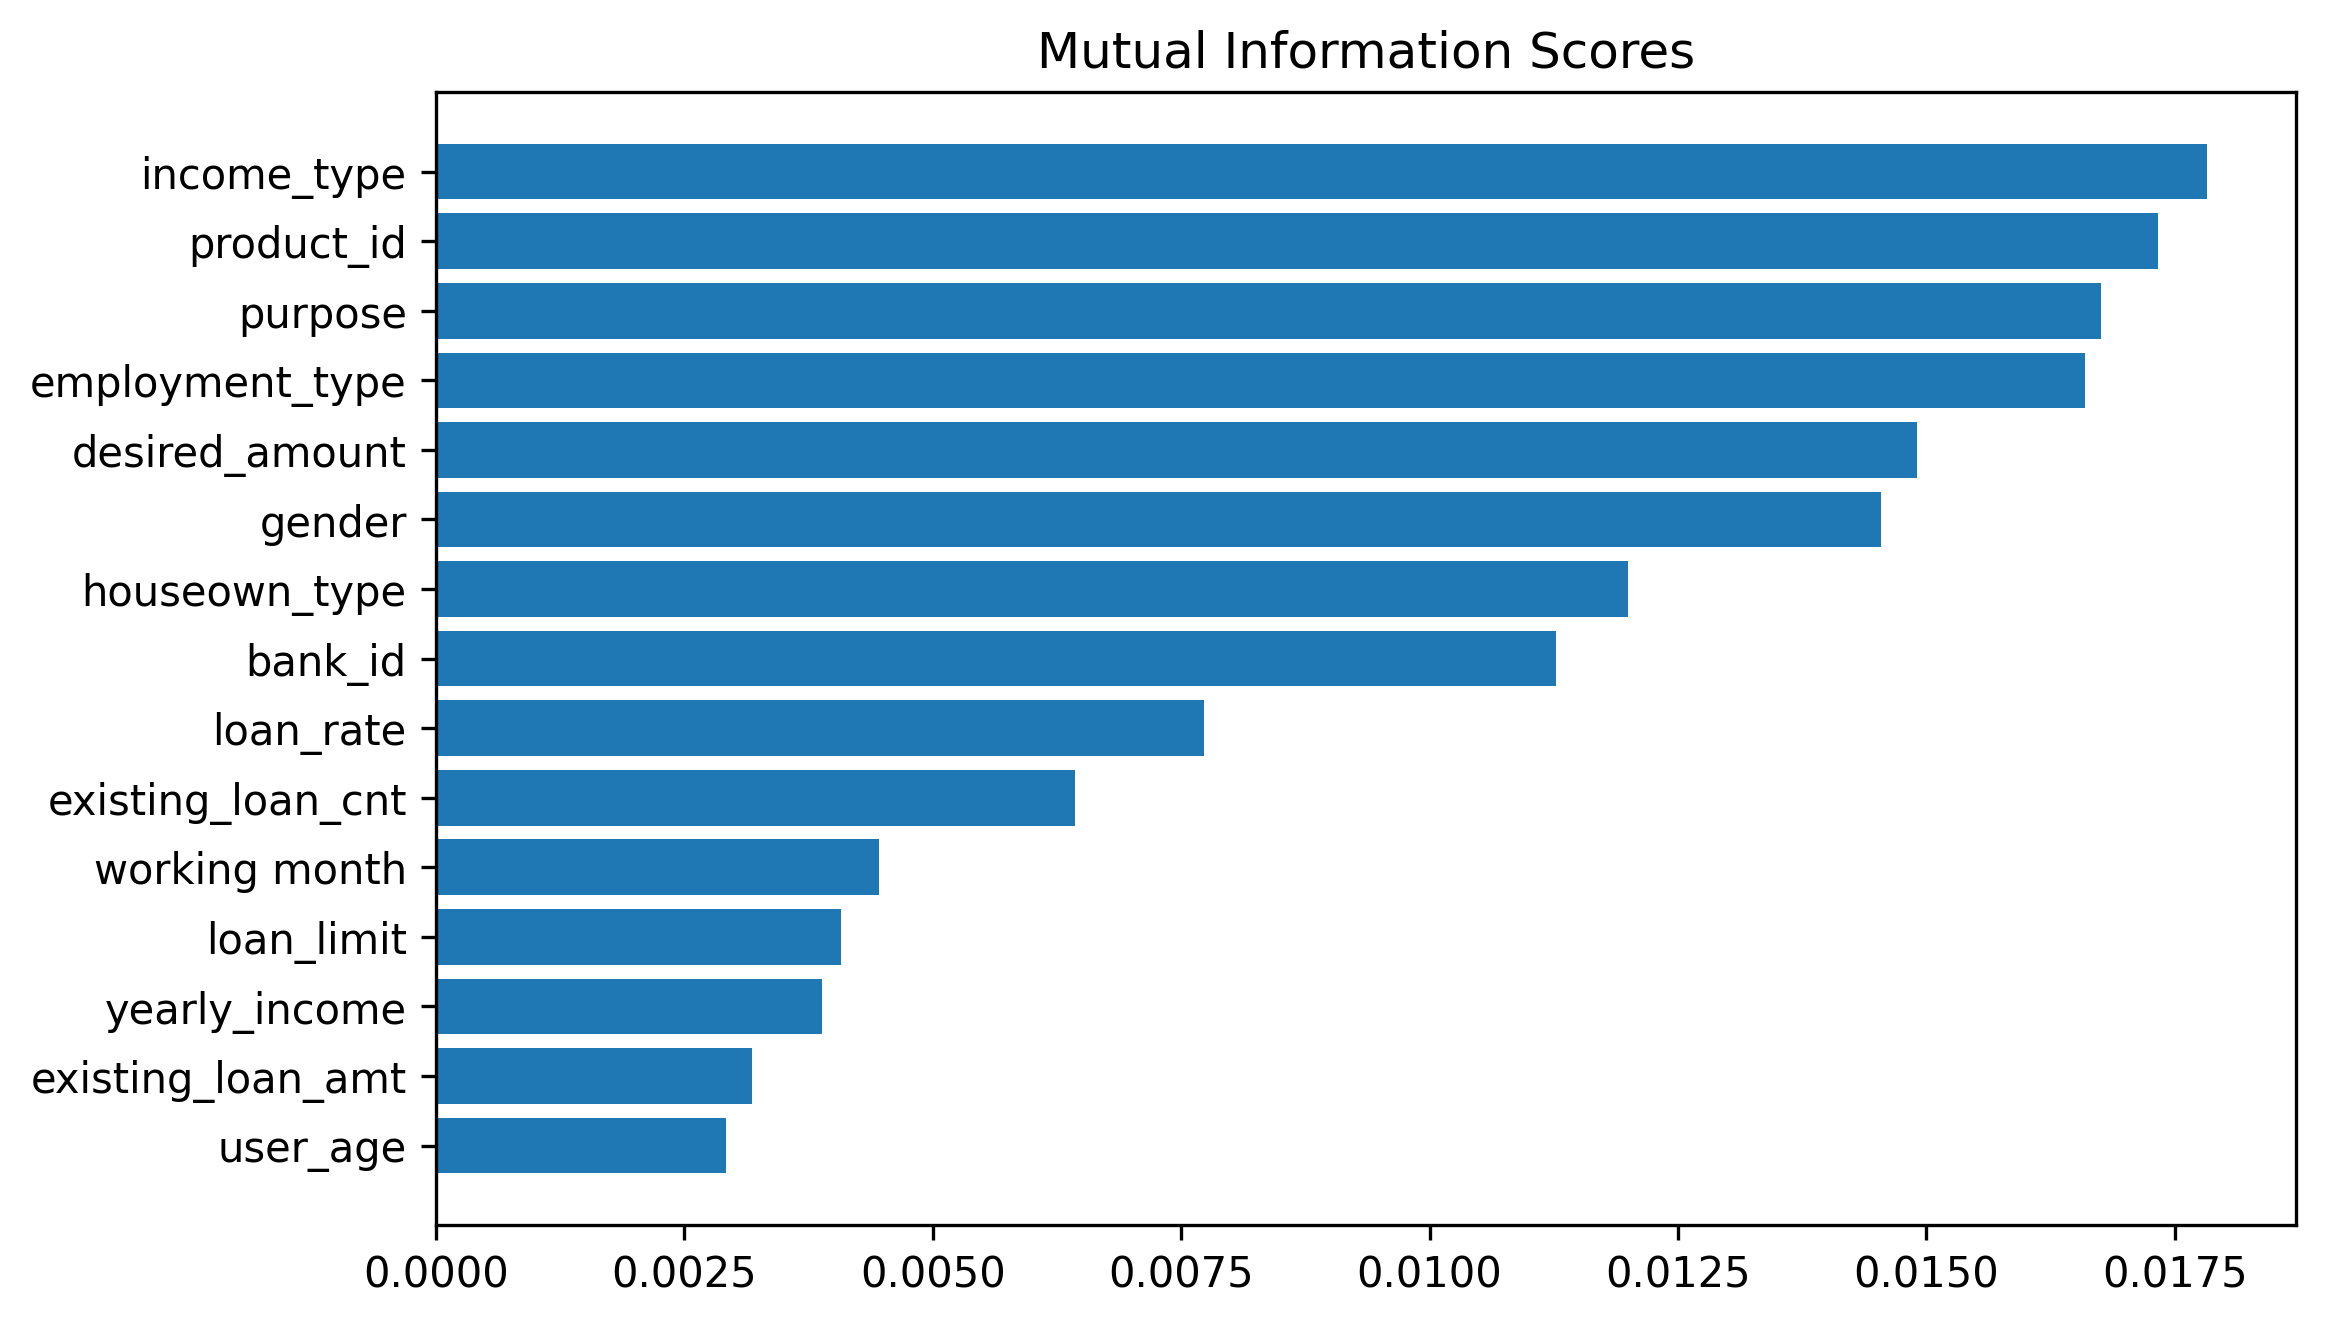

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=300, figsize=(8, 5))
plot_mi_scores(mi_scores)

# 변수끼리 다중공선성 확인

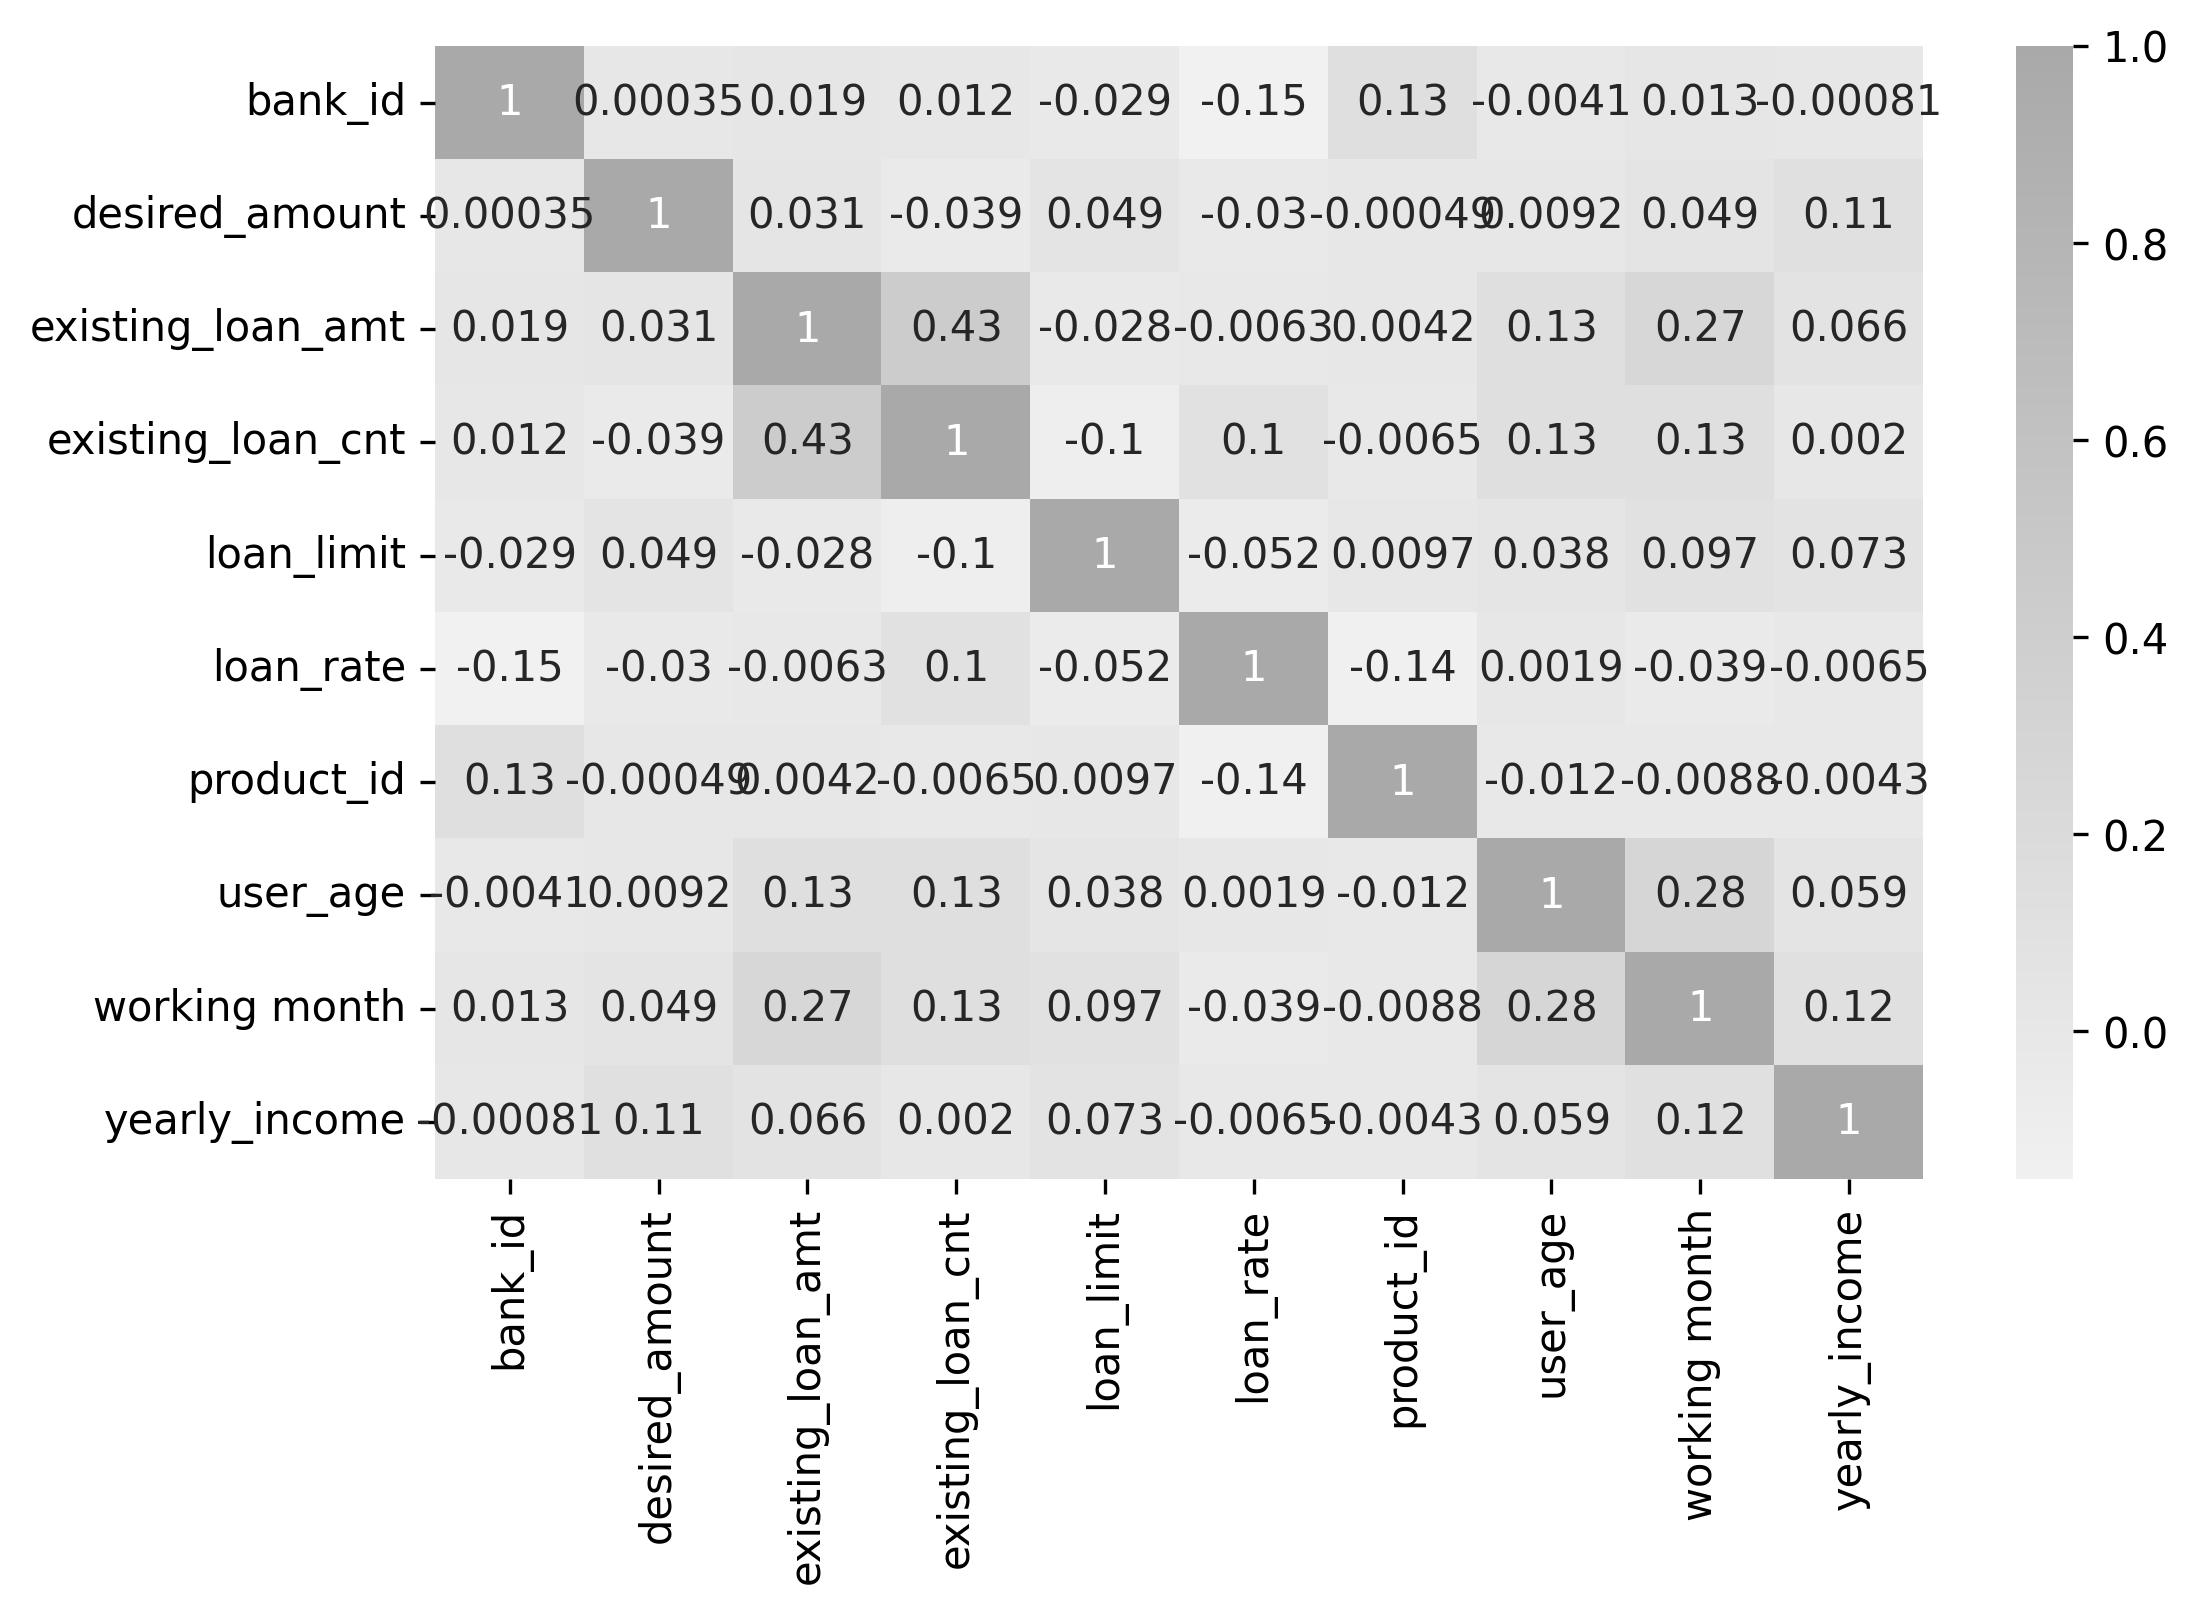

In [ ]:
# heatmap 그리기 -> 다중공선성 아예 안 뜨네
cmap = sns.light_palette("darkgray", as_cmap=True)
plt.figure(dpi=300, figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap=cmap)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif 비교 -> 10이상인 칼럼이 있다면 따로 전처리 필요
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

TypeError: ignored